In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(".\\Data_USD.csv")

In [5]:
#df.tail()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1


In [6]:
print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

Original shape of the data: (30000, 11)


In [7]:
df.describe()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6077.288279,1.603733,1.853133,1.551867,35.485500,-0.182680,1632.020583,191.415565,0.409982,0.423771,0.221200
std,4707.986577,0.489129,0.790349,0.521970,9.217904,0.982063,2295.460479,367.862624,7.671398,0.411462,0.415062
min,362.857143,1.000000,0.000000,0.000000,21.000000,-2.000000,-2033.566333,0.000000,-546.930000,-0.619892,0.000000
25%,1814.285714,1.000000,1.000000,1.000000,28.000000,-0.830000,173.494095,40.396583,0.040000,0.022032,0.000000
50%,5080.000000,2.000000,2.000000,2.000000,34.000000,0.000000,763.880810,86.982905,0.100000,0.313994,0.000000
75%,8708.571429,2.000000,2.000000,2.000000,41.000000,0.000000,2072.074548,202.616405,0.690000,0.829843,0.000000
max,36285.714290,2.000000,6.000000,3.000000,79.000000,6.000000,31833.959100,22763.637240,797.000000,6.455300,1.000000


In [8]:
X = df.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1).values
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
print(X.shape)
print(y.shape)

(30000, 10)
(30000,)


Split my data into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [10]:
features_names

Index(['LIMIT_BAL_US', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SCORE_AVG',
       'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION',
       'DEFAULT_PAYMENT_NEXT_MO'],
      dtype='object')

Instantiate the random forest model with 200 trees

In [11]:
rf = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=15)

In [12]:
#rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=200)

Check feature importance


In [13]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.27108894806377104, 'PAY_SCORE_AVG'),
 (0.13913469435901032, 'PAY_AMT_AVG_US'),
 (0.13084923557078182, 'CREDIT_UTILIZATION'),
 (0.12887164501408613, 'BILL_AVG_US'),
 (0.09843485756048301, 'AGE'),
 (0.08913468720784846, 'LIMIT_BAL_US'),
 (0.07621246368544575, 'PAY_TO_BILL'),
 (0.02938352817085464, 'EDUCATION'),
 (0.019602513568243374, 'MARRIAGE'),
 (0.01728742679947555, 'SEX')]

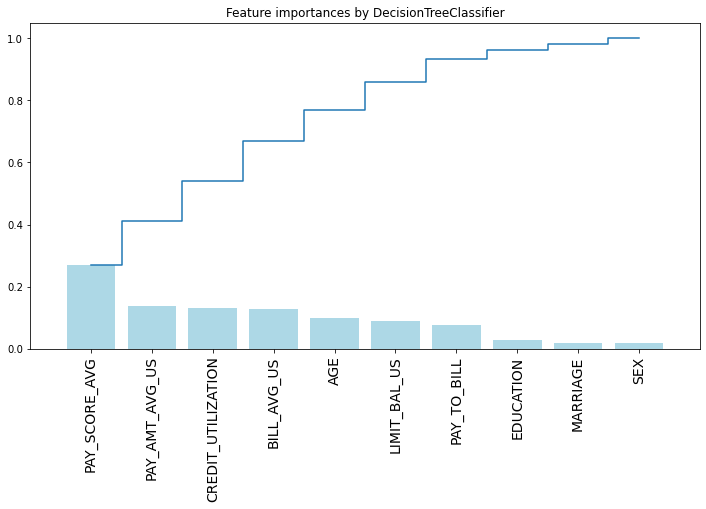

In [14]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [16]:
#Make my predictions
y_prediction = rf.predict(X_test)
y_probability = rf.predict_proba(X_test)
#y_probability[0][1]

In [ ]:
### Grid search
### https://towardsdatascience.com/algorithms-for-hyperparameter-optimisation-in-python-edda4bdb167

In [ ]:
'''
rf_params = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(5,15,1)
}

#gs_random = GridSearchCV(estimator=rf, param_grid=rf_params, cv= 5)
gs_random.fit(X_test, y_prediction)
print(gs_random.best_params_)
'''

In [17]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.3127551020408163


In [18]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [19]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.94      0.88      7040
     default       0.60      0.31      0.41      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [ ]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [20]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6633  407]
 [1347  613]]


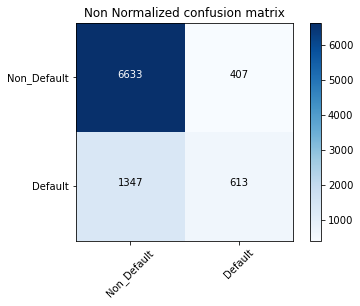

In [22]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')


# Explanation of this confusion matrix
In our confusion matrix, the non-default classification has a total of 2,158 points and defualt clssification has a total of 7,742 points.

It correctly identified 7239 points as default and 503 points as non-default.

Non_default classification incorectly predicted 1480 points as default  and correctly classified 678 points as Non defualt. 


In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')


In [ ]:
import pickle
filename = 'RandomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))